In [26]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs

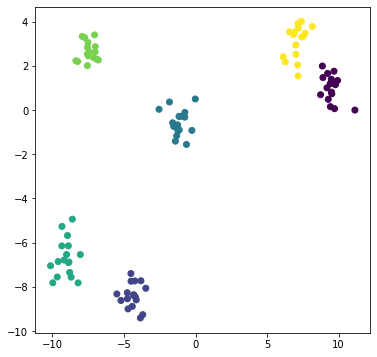

In [27]:
x,y = make_blobs(n_samples=100,centers=6,random_state=45,cluster_std=0.6)
plt.figure(figsize=(6,6))
plt.scatter(x[:,0],x[:,1],c=y) 

In [31]:
# 引入scipy 距离函数，默认欧氏距离
from scipy.spatial.distance import cdist
class K_means(object):
    # 初始化参数， n_clusters(K),迭代次数max_iter,初始质心centroids
    def __init__(self,n_clusters=6,max_iter=300,centroids=[]):
        self.n_clusters=n_clusters
        self.max_iter=max_iter
        self.centroids = np.array(centroids,dtype=np.float) #将一般数组转化为array
    # 训练模型方法    
    def fit(self,data):
        if (self.centroids.shape == (0,)):
            self.centroids = data[np.random.randint(0,data.shape[0].slef.n_clusters),:]
        for i in range(self.max_iter):
            # 1.计算每个点到质点的距离，这里一次性计算了每个点到6个质点的距离
            distances = cdist(data,self.centroids) #要求2个参数相同维度就是，最终这里得到了100*6的二维数组，每一行代表这个点与6个质点的距离
            # 2.选取距该点最近r的那个质点，作为该点的分类，
            c_ind = np.argmin(distances,axis =1) # 每一行取最小值的坐标,这个坐标就是对应于哪一类
            # 3.对分到一类的数据进行均值计算，以均值作为新的质点坐标，
            for i in range(self.n_clusters):
                # 排除掉没有出现在c_ind里面的，即没有分到数据到这一类。
                if i in c_ind:
                    # 更新质点
                    self.centroids[i]=np.mean(data[c_ind==i],axis=0) # 在data中去选择c_ind==i为true的数值，布尔索引，对每一列做均值运算
                                                              # axis = 0,意思是每列求平均，返回一组数据，有多少列就有多少数据
    # 实现预测方法
    def predict(self,samples):
        distances = cdist(samples,self.centroids) 
        c_ind = np.argmin(distances,axis =1)
        return c_ind
                    

# 测试

C:\Users\water\AppData\Local\Temp\ipykernel_15392\2543713542.py:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self.centroids = np.array(centroids,dtype=np.float) #将一般数组转化为array


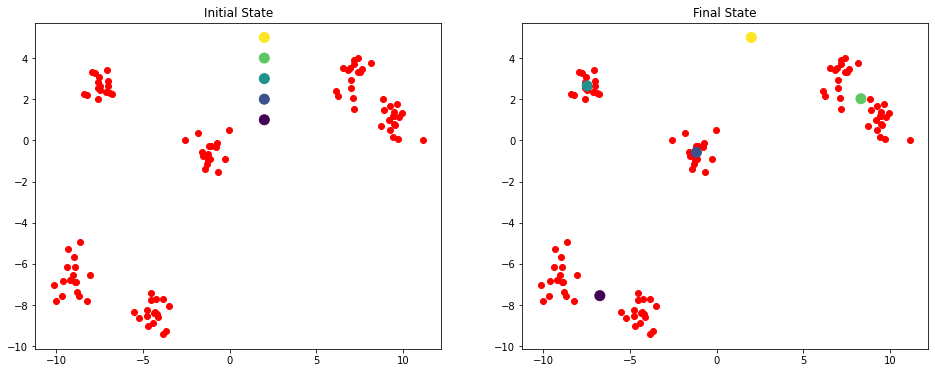

In [32]:
# 定义一个绘制子图的函数


def plotKMeans(x,y,centroids,subplot,title):
   # 分配子图，121表示1行2列的子图中的第一个
    plt.subplot(subplot)
    plt.scatter(x[:,0], x[:,1], c='r')
    # 画出质心点
    plt.scatter(centroids[:,0], centroids[:,1], c=np.array(range(5)), s=100)
    plt.title(title)    
kmeans = K_means(max_iter=300, centroids=np.array([[2,1],[2,2],[2,3],[2,4],[2,5]]))   
plt.figure(figsize=(16, 6))
plotKMeans( x, y, kmeans.centroids, 121, 'Initial State' )

# 开始聚类
kmeans.fit(x)

plotKMeans( x, y, kmeans.centroids, 122, 'Final State' )